In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Преобразование Бокса-Кокса

Если случайная величина имеет логнормальное распределение, то ее логарифм имеет нормальное распределение.

In [2]:
data_log = pd.Series(np.random.lognormal(0, 1, 1000))

<AxesSubplot:>

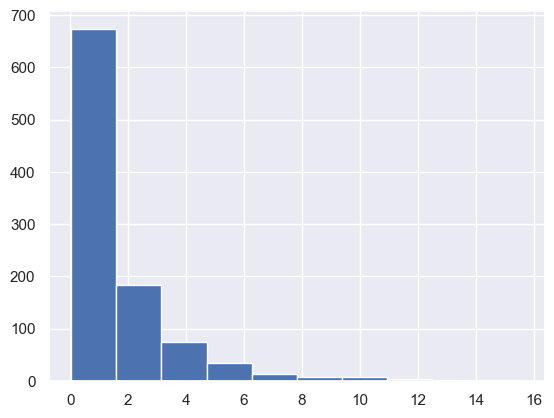

In [3]:
data_log.hist()

<AxesSubplot:>

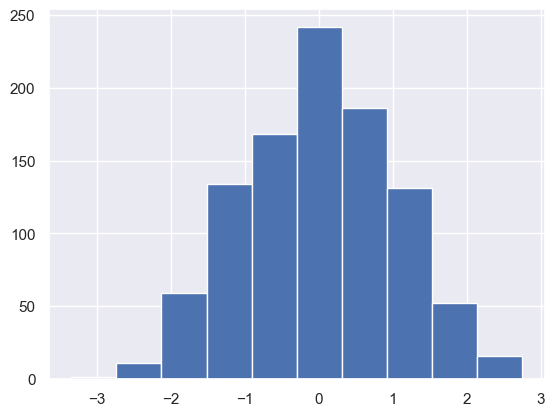

In [4]:
np.log(data_log).hist()

Почему это работает?

In [5]:
log_x = np.arange(0.01, 20, 0.01)
log_y = np.log(log_x)

x_points = data
y_points = np.zeros(1000)

fig = plt.figure()
plt.plot(x_points, y_points, 'o', label="lognormal")
plt.plot(log_x, log_y, 'black', label='log(x)')

plt.legend()

fig.show()

NameError: name 'data' is not defined

Если экспоненциальное распределение?

In [6]:
data_exp = pd.Series(np.random.exponential(size=1000))

<AxesSubplot:>

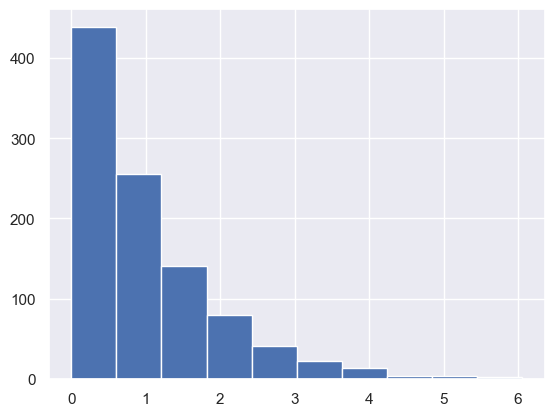

In [7]:
data_exp.hist()

In [8]:
np.log(data).hist()

NameError: name 'data' is not defined

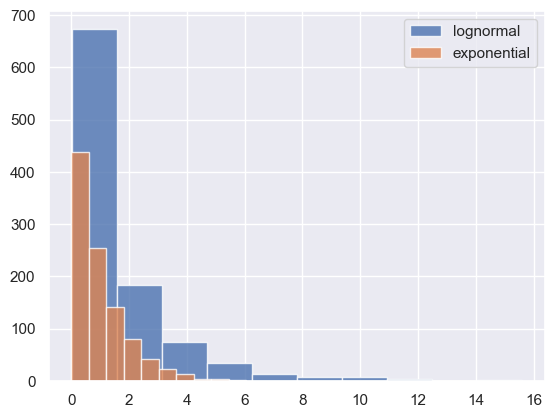

In [9]:
plt.hist(data_log, label='lognormal', alpha=.8)
plt.hist(data_exp, label='exponential', alpha=.8)
plt.legend()

plt.show()

Найдем такое преобразование.

$$\int\frac{1}{x^{1-\lambda}}=\frac{x^\lambda-1}{\lambda}+C,$$
где $\lambda$ - искомый параметр.

$$x^*_i=\begin{cases}
\ln(x), & \lambda=0 \\
\frac{x^\lambda-1}{\lambda}, & \text{в обратном случае.}
\end{cases}$$

In [10]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data_exp)

<AxesSubplot:>

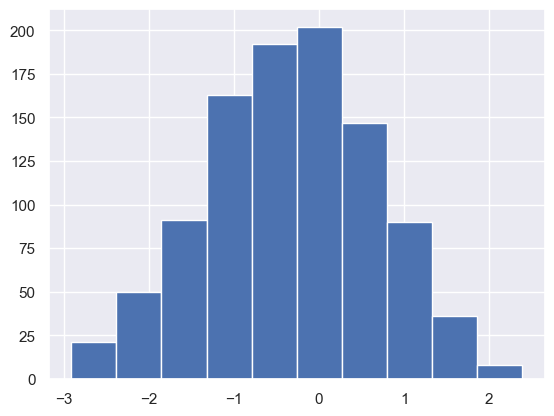

In [11]:
pd.Series(transformed_data).hist()

In [12]:
best_lambda

0.299195996094805

# Отбор признаков

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [24]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [5]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [6]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<AxesSubplot:xlabel='engine-type', ylabel='Count'>

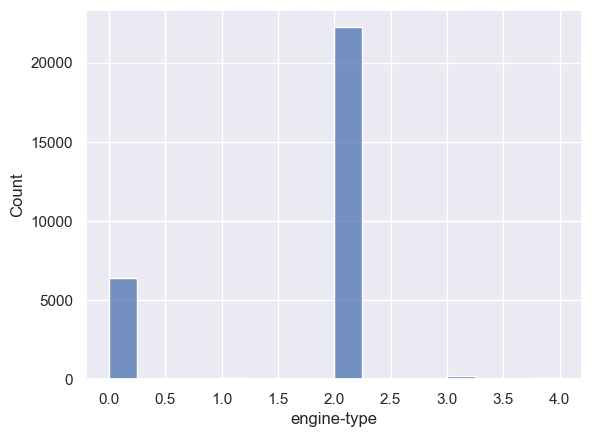

In [17]:
sns.histplot(data=train_X, x='engine-type')

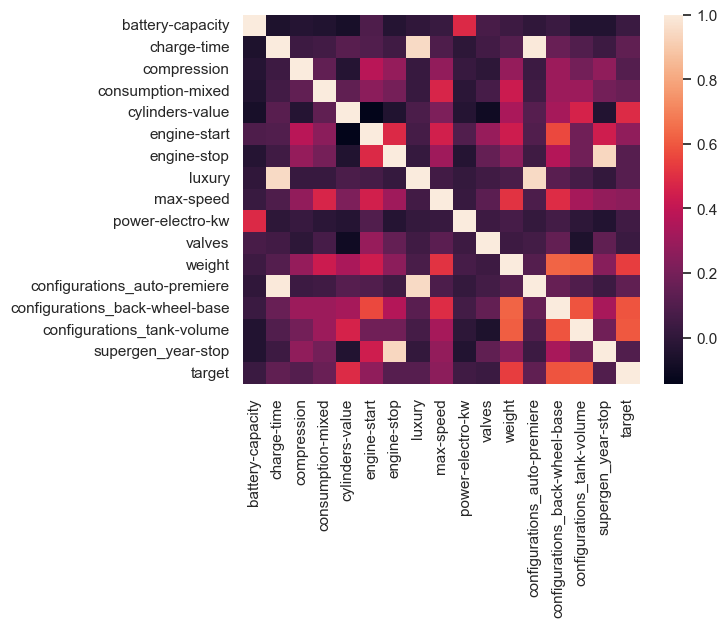

In [8]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [9]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.11003752360955492 p-value: 9.72564682923319e-79


In [10]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667101297 p-value: 5.6105473635703526e-05


## F-test

In [55]:
from sklearn.feature_selection import f_regression, SelectKBest

In [12]:
f_statistic, p_values = f_regression(train_X, train_y)

C:\Users\grkis\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 1.00000000e+000])

In [14]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

C:\Users\grkis\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  2.0000e+03,
         1.6000e+01,  0.0000e+00],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  1.9960e+03,
         2.3000e+01,  0.0000e+00],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  2.0120e+03,
         1.0000e+01,  0.0000e+00],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ..., -1.0000e+00,
         2.6000e+01,  0.0000e+00],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.9950e+03,
         1.6000e+01,  0.0000e+00],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  2.0070e+03,
         3.5000e+01,  0.0000e+00]])

In [15]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'valves', 'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial'], dtype=object)

## Значения Шепли

In [23]:
!pip install shap --user

  Using cached shap-0.44.1-cp39-cp39-win_amd64.whl (450 kB)


In [16]:
import shap

In [25]:
reg = LinearRegression().fit(train_X, train_y)

In [26]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

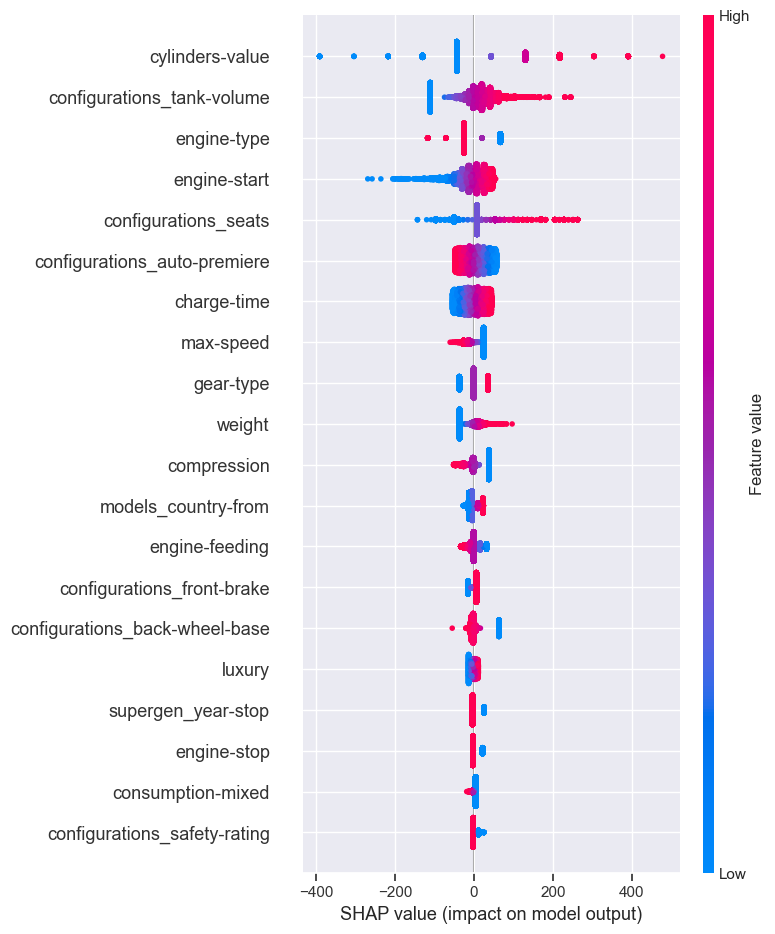

In [27]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [28]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

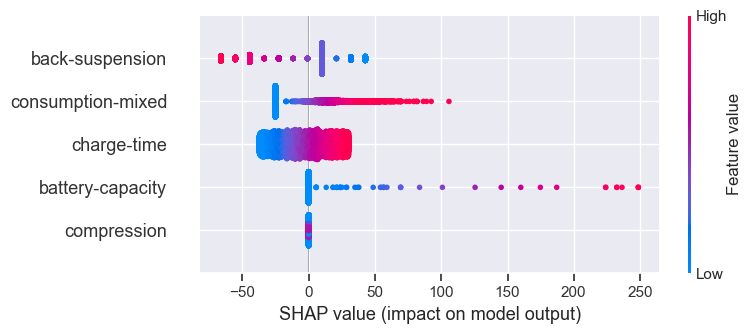

In [29]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [30]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [31]:
from math import factorial as f

In [32]:
shap_dict = {}
N = train_cut_X.columns
for i in N:
    S = list(powerset(N.drop(i)))
    shap_sum = 0
    for s in S:
        n = f(len(s)) * f((len(s) + len(N))) / f(len(N))
        reg_w_i = LinearRegression().fit(train_cut_X, train_y)
        reg_wo_i = LinearRegression().fit(train_cut_X.drop(i, axis=1), train_y)
        shap_sum += n * (reg_w_i.score(test_cut_X, test_y) - reg_wo_i.score(test_cut_X.drop(i, axis=1), test_y))
    shap_dict[i] = shap_sum

In [33]:
[print(k, v) for k, v in sorted(shap_dict.items(), key=lambda x: x[1], reverse=True)];

back-suspension 1110.7369931479698
consumption-mixed 677.7873114295717
charge-time 459.9163674926558
battery-capacity 108.83612156291747
compression 0.3886664540426893


## Пермутационная важность

In [15]:
!pip install eli5

     -------------------------------------- 216.2/216.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 133.2/133.2 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=c792cee55b9a28f70cfb819ee8bea68a78c09a4654fbfaf073c059897b0743f6
  Stored in directory: c:\users\grkis\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [34]:
import eli5
from eli5.sklearn import PermutationImportance

In [35]:
reg = LinearRegression().fit(train_X, train_y)

In [36]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [37]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.3617 ± 0.0044,cylinders-value
0.1035 ± 0.0039,configurations_tank-volume
0.0959 ± 0.0066,configurations_seats
0.0498 ± 0.0020,engine-type
0.0466 ± 0.0009,engine-start
0.0291 ± 0.0012,configurations_auto-premiere
0.0287 ± 0.0023,charge-time
0.0196 ± 0.0027,compression
0.0193 ± 0.0019,gear-type
0.0165 ± 0.0020,weight


### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [38]:
reg_basic = LinearRegression().fit(train_X, train_y)
perm_dict = {}
N = train_X.columns
for i in N:
    perm_test_X = test_X.copy()
    perm_test_X[i] = np.random.permutation(perm_test_X[i].values)
    perm_dict[i] = reg_basic.score(test_X, test_y) - reg_basic.score(perm_test_X, test_y)

In [39]:
[print(k, v) for k, v in sorted(perm_dict.items(), key=lambda x: x[1], reverse=True)];

cylinders-value 0.3694644923316909
configurations_tank-volume 0.09913424683209882
configurations_seats 0.09481121446527974
engine-type 0.051985554694010894
engine-start 0.047038769919557355
configurations_auto-premiere 0.02913106625958728
charge-time 0.02739273237975104
gear-type 0.019577256129083676
compression 0.018958956754298706
weight 0.015590554121379774
max-speed 0.013197599102335422
configurations_back-wheel-base 0.012254648703203586
battery-capacity 0.010242852442965522
models_country-from 0.007187015150817544
engine-feeding 0.006236506640673878
models_light-and-commercial 0.0033053407064721485
valves 0.00305081712107258
configurations_front-brake 0.0030066127183310254
supergen_year-stop 0.0025940084009729025
engine-stop 0.0022764108503179337
luxury 0.001654535229803633
configurations_safety-rating 0.0010057544899189086
consumption-mixed 0.0006379202260974326
power-electro-kw 0.0004713701540308701
valvetrain 0.00018932622452449976
models_male 0.00018124566650878915
supply-syst

# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
a = poly.fit_transform(X)
X_poly = pd.DataFrame(a, columns=poly.get_feature_names_out(X.columns))
X_poly

,1,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,models_country-from^2,models_country-from models_group,models_country-from models_light-and-commercial,models_country-from models_male,models_group^2,models_group models_light-and-commercial,models_group models_male,models_light-and-commercial^2,models_light-and-commercial models_male,models_male^2
0,1.0,9.0,-1.0,36457.0,9.0,4.3,0.0,3.0,4.0,2006.0,...,256.0,48.0,0.0,16.0,9.0,0.0,3.0,0.0,0.0,1.0
1,1.0,3.0,-1.0,44872.0,8.0,-1.0,3.0,7.0,4.0,1982.0,...,1156.0,102.0,0.0,34.0,9.0,0.0,3.0,0.0,0.0,1.0
2,1.0,3.0,-1.0,55927.0,16.0,4.2,0.0,4.0,5.0,2014.0,...,1225.0,105.0,0.0,35.0,9.0,0.0,3.0,0.0,0.0,1.0
3,1.0,0.0,-1.0,41405.0,10.3,-1.0,0.0,4.0,4.0,2000.0,...,100.0,30.0,0.0,10.0,9.0,0.0,3.0,0.0,0.0,1.0
4,1.0,8.0,-1.0,22523.0,19.0,-1.0,0.0,4.0,8.0,2000.0,...,100.0,30.0,0.0,10.0,9.0,0.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,1.0,9.0,-1.0,34558.0,11.2,6.6,0.0,4.0,4.0,2004.0,...,225.0,45.0,0.0,15.0,9.0,0.0,3.0,0.0,0.0,1.0
43241,1.0,3.0,-1.0,38268.0,9.6,5.8,0.0,4.0,2.0,2013.0,...,100.0,30.0,0.0,10.0,9.0,0.0,3.0,0.0,0.0,1.0
43242,1.0,3.0,-1.0,8958.0,10.0,9.3,0.0,4.0,4.0,1991.0,...,256.0,48.0,0.0,16.0,9.0,0.0,3.0,0.0,0.0,1.0
43243,1.0,3.0,-1.0,20293.0,8.5,-1.0,0.0,5.0,4.0,2002.0,...,784.0,84.0,0.0,28.0,9.0,0.0,3.0,0.0,0.0,1.0


In [49]:
train_X, test_X, train_y, test_y = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [50]:
reg = LinearRegression().fit(train_X, train_y)

In [51]:
reg.score(test_X, test_y)

0.6896800623100565

In [52]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [53]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
13392.0610 ± 279.6273,models_male
13073.7631 ± 219.3878,models_group models_male
1533.1779 ± 26.3039,engine-start
1511.8337 ± 15.1870,engine-start^2
1190.4956 ± 4.8041,configurations_auto-premiere
698.7994 ± 10.6812,engine-start configurations_auto-premiere
408.7325 ± 8.9843,charge-time
206.6447 ± 2.7175,configurations_safety-rating
203.7621 ± 4.8800,engine-start configurations_safety-rating
165.4957 ± 2.4955,engine-start max-speed


In [56]:
f_statistic, p_values = f_regression(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
divide by zero encountered in true_divide
invalid value encountered in true_divide


In [57]:
p_values

array([            nan, 4.14261514e-178, 5.61054736e-005, 2.22583374e-084,
       4.29215233e-006, 5.19880608e-097, 0.00000000e+000, 0.00000000e+000,
       3.00761649e-002, 1.23407205e-153, 1.91780781e-122, 1.08128701e-102,
       5.89170255e-038, 1.18423856e-051, 6.73034264e-090, 6.04804785e-008,
       3.29025321e-015, 3.33873440e-033, 1.45689423e-002, 0.00000000e+000,
       9.72564683e-079, 6.46321123e-022, 5.15233301e-231, 8.63015515e-002,
       0.00000000e+000, 0.00000000e+000, 1.90641086e-122, 7.01981268e-140,
       5.09638729e-005, 4.56879391e-064, 3.51507643e-001, 5.18239793e-169,
       6.62852827e-019, 4.16541859e-036, 6.03341233e-054, 1.98830649e-016,
       0.00000000e+000, 1.84948692e-001, 1.07833704e-077, 2.44548297e-176,
       7.86777458e-222, 3.46012858e-227, 1.32731506e-024, 1.49215467e-052,
       4.28290186e-001, 9.17237695e-013, 2.50717204e-001, 6.29397109e-023,
       9.37110996e-037, 2.18315776e-071, 1.25717702e-038, 2.69234645e-157,
       5.46750091e-007, 1

In [59]:
sekector = SelectKBest(f_regression, k=100)
sekector.fit_transform(train_X, train_y);

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
divide by zero encountered in true_divide
invalid value encountered in true_divide


In [61]:
top_100 = sekector.get_feature_names_out()

In [63]:
reg_top_100 = LinearRegression().fit(train_X[top_100], train_y)

In [64]:
reg_top_100.score(test_X[top_100], test_y)

0.6266276993954633